<a href="https://colab.research.google.com/github/makxxic/NOTEBOOKS/blob/main/MLweek3assg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0   

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64 

Training samples: 120, Testing samples: 30

Model Evaluation Metrics:
Accuracy : 0.967
Precision: 0.970
Recall   : 0.967

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  vers

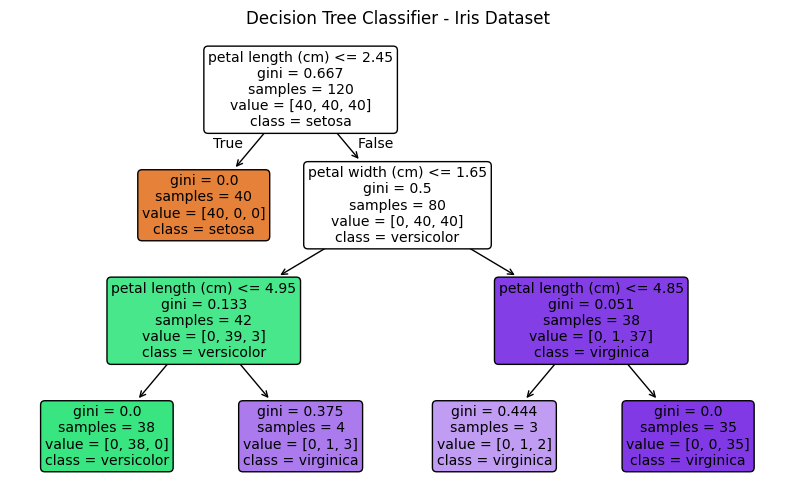

In [ ]:
# ==============================================================
# AI Tools Assignment - Task 1: Classical ML with Scikit-learn
# Dataset: Iris Species Dataset
# Goal: Predict iris species using a Decision Tree Classifier
# ==============================================================

# Import essential libraries for data manipulation, machine learning, and model evaluation
import pandas as pd # Import pandas for data handling (DataFrames)
from sklearn.datasets import load_iris # Import load_iris to get the dataset
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding target variable
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier for the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report # Import metrics for evaluation

# --------------------------------------------------------------
# 1 Load and Inspect the Dataset
# --------------------------------------------------------------
# Load the Iris dataset from sklearn's built-in library
iris = load_iris()

# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(iris.data, columns=iris.feature_names) # Create DataFrame from data with feature names as columns
df['species'] = iris.target  # Add the target column (encoded as 0,1,2 by default in sklearn)

# Display the first few rows of the DataFrame
print("Dataset Preview:") # Print a header for the preview
print(df.head(), "\n") # Print the first 5 rows of the DataFrame

# --------------------------------------------------------------
# 2 Check for Missing Values
# --------------------------------------------------------------
print("Checking for missing values:") # Print a header for missing value check
print(df.isnull().sum(), "\n") # Print the count of missing values for each column

# No missing values exist in this dataset, but we demonstrate how to handle them if they did:
# df = df.fillna(df.mean()) # Example of filling missing values with the mean of the column

# --------------------------------------------------------------
# 3 Encode Labels (if needed)
# --------------------------------------------------------------
# The target is already numeric (0,1,2), but for demonstration, we'll show the encoding process
label_encoder = LabelEncoder() # Initialize the LabelEncoder
df['species'] = label_encoder.fit_transform(df['species']) # Fit and transform the 'species' column

# --------------------------------------------------------------
# 4 Split the Data into Train and Test Sets
# --------------------------------------------------------------
X = df.drop('species', axis=1)  # Define features (X) by dropping the 'species' column
y = df['species']               # Define the target variable (y) as the 'species' column

# Split the data into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Split X and y, 20% for testing, use random_state for reproducibility, stratify to maintain class distribution
)

# Print the number of samples in the training and testing sets
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}\n") # Print the shapes of the resulting sets

# --------------------------------------------------------------
# 5 Initialize and Train the Decision Tree Model
# --------------------------------------------------------------
# Create a Decision Tree Classifier instance
model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3) # Initialize the model with parameters

# Train (fit) the model using the training data
model.fit(X_train, y_train) # Train the model on the training features and target

# --------------------------------------------------------------
# 6 Make Predictions
# --------------------------------------------------------------
# Make predictions on the test set
y_pred = model.predict(X_test) # Predict the target variable for the test features

# --------------------------------------------------------------
# 7 Evaluate Model Performance
# --------------------------------------------------------------
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy score
precision = precision_score(y_test, y_pred, average='macro') # Calculate the precision score with macro averaging
recall = recall_score(y_test, y_pred, average='macro') # Calculate the recall score with macro averaging

# Print the evaluation metrics
print("Model Evaluation Metrics:") # Print a header for evaluation metrics
print(f"Accuracy : {accuracy:.3f}") # Print the calculated accuracy
print(f"Precision: {precision:.3f}") # Print the calculated precision
print(f"Recall   : {recall:.3f}\n") # Print the calculated recall

# Print the detailed classification report for further insight
print("Detailed Classification Report:") # Print a header for the classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names)) # Print the classification report with target names

# --------------------------------------------------------------
# 8  Visualize Decision Tree Structure
# --------------------------------------------------------------
# Import libraries for visualization
from sklearn import tree # Import the tree module
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Create a figure and axes for the plot
plt.figure(figsize=(10,6)) # Set the size of the figure

# Plot the decision tree
tree.plot_tree(model, feature_names=iris.feature_names, # Plot the tree, using feature names
               class_names=iris.target_names, filled=True, rounded=True) # Use class names, fill nodes with color, round node corners
plt.title("Decision Tree Classifier - Iris Dataset") # Set the title of the plot
plt.show() # Display the plot

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 - 45s - 48ms/step - accuracy: 0.9514 - loss: 0.1584 - val_accuracy: 0.9827 - val_loss: 0.0550
Epoch 2/5
938/938 - 42s - 45ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9883 - val_loss: 0.0337
Epoch 3/5
938/938 - 42s - 45ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9886 - val_loss: 0.0329
Epoch 4/5
938/938 - 82s - 87ms/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.9875 - val_loss: 0.0380
Epoch 5/5
938/938 - 43s - 46ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9917 - val_loss: 0.0273

Test Accuracy: 99.17%


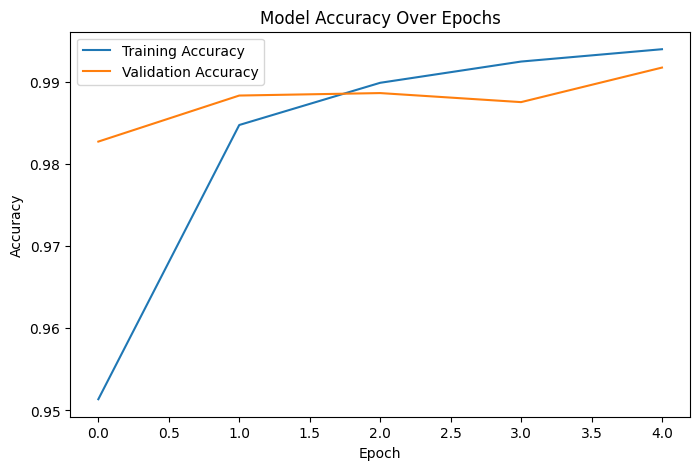

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


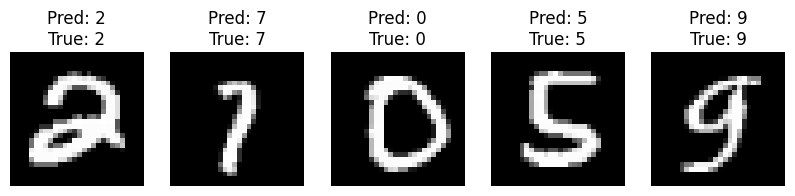


Model saved as mnist_cnn_model.h5


In [ ]:
# ============================================================
# Task 2: Deep Learning with TensorFlow
# Dataset: MNIST Handwritten Digits
# Goal: Build a CNN to classify digits and achieve >95% accuracy
# ============================================================

# Import required libraries
import tensorflow as tf # Import TensorFlow, the deep learning framework
from tensorflow.keras import datasets, layers, models # Import specific modules for datasets, layers, and models from Keras (TensorFlow's high-level API)
import matplotlib.pyplot as plt # Import matplotlib for plotting graphs
import numpy as np # Import numpy for numerical operations

# ------------------------------------------------------------
# Step 1: Load and preprocess the dataset
# ------------------------------------------------------------
# The MNIST dataset contains 60,000 training images and 10,000 test images
# Each image is 28x28 pixels (grayscale)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() # Load the MNIST dataset, splitting it into training and testing sets

# Normalize pixel values to the range [0,1] for better training stability
x_train, x_test = x_train / 255.0, x_test / 255.0 # Divide pixel values by 255 to scale them between 0 and 1

# Reshape data to include a channel dimension (needed for CNN input)
# Shape: (num_samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1) # Reshape training data to add a channel dimension (1 for grayscale)
x_test = x_test.reshape(-1, 28, 28, 1) # Reshape testing data to add a channel dimension (1 for grayscale)

print(f"Training data shape: {x_train.shape}") # Print the shape of the training data
print(f"Testing data shape: {x_test.shape}") # Print the shape of the testing data

# ------------------------------------------------------------
# Step 2: Build the CNN model architecture
# ------------------------------------------------------------
# Typical CNN architecture for MNIST classification

model = models.Sequential([ # Create a Sequential model, where layers are added in order
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Add a 2D convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and specifying input shape
    layers.MaxPooling2D((2, 2)), # Add a 2D max pooling layer with a 2x2 pool size

    layers.Conv2D(64, (3, 3), activation='relu'), # Add another 2D convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    layers.MaxPooling2D((2, 2)), # Add another 2D max pooling layer with a 2x2 pool size

    layers.Flatten(), # Flatten the output from the convolutional layers into a 1D array
    layers.Dense(128, activation='relu'), # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(10, activation='softmax')  # Add the output dense layer with 10 units (for 10 classes) and softmax activation for probabilities
])

# Display model architecture
model.summary() # Print a summary of the model's architecture

# ------------------------------------------------------------
# Step 3: Compile the model
# ------------------------------------------------------------
model.compile(
    optimizer='adam',              # Use the Adam optimizer
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy as the loss function (suitable for integer labels)
    metrics=['accuracy']           # Track accuracy during training
)

# ------------------------------------------------------------
# Step 4: Train the model
# ------------------------------------------------------------
# Training with 5 epochs usually achieves >98% accuracy
history = model.fit(
    x_train, y_train,
    epochs=5, # Train for 5 epochs
    validation_data=(x_test, y_test), # Use the test data for validation
    batch_size=64, # Use a batch size of 64
    verbose=2 # Display training progress verbosely (one line per epoch)
)

# ------------------------------------------------------------
# Step 5: Evaluate the model
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Evaluate the model on the test data
print(f"\nTest Accuracy: {test_acc * 100:.2f}%") # Print the test accuracy

# ------------------------------------------------------------
# Step 6: Visualize model performance
# ------------------------------------------------------------
plt.figure(figsize=(8, 5)) # Create a figure for the plot
plt.plot(history.history['accuracy'], label='Training Accuracy') # Plot the training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plot the validation accuracy over epochs
plt.title('Model Accuracy Over Epochs') # Set the title of the plot
plt.xlabel('Epoch') # Set the x-axis label
plt.ylabel('Accuracy') # Set the y-axis label
plt.legend() # Display the legend
plt.show() # Show the plot

# ------------------------------------------------------------
# Step 7: Visualize sample predictions
# ------------------------------------------------------------
# Select 5 random test images
num_samples = 5 # Define the number of samples to visualize
indices = np.random.choice(len(x_test), num_samples, replace=False) # Select random indices from the test set
sample_images = x_test[indices] # Get the sample images
sample_labels = y_test[indices] # Get the sample labels

# Predict using the trained model
predictions = np.argmax(model.predict(sample_images), axis=1) # Make predictions on the sample images and get the predicted class

# Plot the images with predicted and true labels
plt.figure(figsize=(10, 4)) # Create a figure for the plot
for i in range(num_samples): # Loop through the sample images
    plt.subplot(1, num_samples, i + 1) # Create a subplot for each image
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray') # Display the image in grayscale
    plt.title(f"Pred: {predictions[i]}\nTrue: {sample_labels[i]}") # Set the title with predicted and true labels
    plt.axis('off') # Turn off the axes
plt.show() # Show the plot

# ------------------------------------------------------------
# Step 8: Save the trained model
# ------------------------------------------------------------
model.save("mnist_cnn_model.h5") # Save the trained model in HDF5 format
print("\nModel saved as mnist_cnn_model.h5") # Print a confirmation message

Epoch [1/5] - Loss: 0.1628 - Accuracy: 95.03%
Epoch [2/5] - Loss: 0.0455 - Accuracy: 98.63%
Epoch [3/5] - Loss: 0.0307 - Accuracy: 99.08%
Epoch [4/5] - Loss: 0.0233 - Accuracy: 99.23%
Epoch [5/5] - Loss: 0.0183 - Accuracy: 99.41%

Training complete!

Test Accuracy: 98.87%


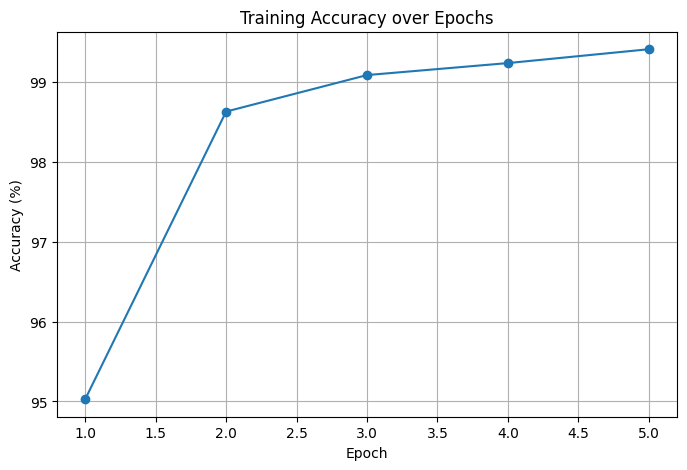

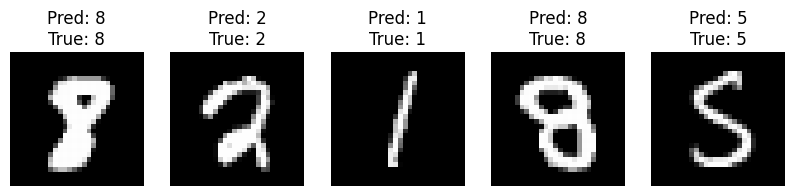

In [ ]:
# ============================================================
# Task 2: Deep Learning with PyTorch
# Dataset: MNIST Handwritten Digits
# Goal: Build a CNN to classify digits and achieve >95% accuracy
# ============================================================

# Step 1: Import Libraries
import torch # Import the main PyTorch library
import torch.nn as nn # Import the neural network module
import torch.nn.functional as F # Import the functional module (contains activation functions, etc.)
import torch.optim as optim # Import the optimization module (contains optimizers like Adam)
from torchvision import datasets, transforms # Import datasets and transforms from torchvision (for common datasets and image transformations)
from torch.utils.data import DataLoader # Import DataLoader for efficient data loading in batches
import matplotlib.pyplot as plt # Import matplotlib for plotting graphs
import numpy as np # Import numpy for numerical operations

# ------------------------------------------------------------
# Step 2: Define Transformations & Load Dataset
# ------------------------------------------------------------
# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL Image or numpy.ndarray to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values (mean and std for grayscale images)
])

# Download and load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Download and load the MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders for iterating through the datasets in batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # DataLoader for training data, shuffled
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False) # DataLoader for test data, not shuffled

# ------------------------------------------------------------
# Step 3: Define the CNN Model Architecture
# ------------------------------------------------------------
# Define the CNN model as a PyTorch Module
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # First convolutional layer: 1 input channel (grayscale), 32 output channels, 3x3 kernel size, 1 pixel padding
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Second convolutional layer: 32 input channels, 64 output channels, 3x3 kernel size, 1 pixel padding
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Max pooling layer: 2x2 window size, stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        # First fully connected layer: input size calculated from previous layers, 128 output units
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Second fully connected layer (output layer): 128 input units, 10 output units (for 10 classes)
        self.fc2 = nn.Linear(128, 10)

    # Define the forward pass of the model
    def forward(self, x):
        # Apply convolution 1, ReLU activation, and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply convolution 2, ReLU activation, and max pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # Apply fully connected layer 1 and ReLU activation
        x = F.relu(self.fc1(x))
        # Apply fully connected layer 2 (output layer)
        x = self.fc2(x)
        return x

# Instantiate the CNN model
model = CNNModel()

# ------------------------------------------------------------
# Step 4: Define Loss Function and Optimizer
# ------------------------------------------------------------
# Define the loss function: Cross Entropy Loss is suitable for multi-class classification
criterion = nn.CrossEntropyLoss()
# Define the optimizer: Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ------------------------------------------------------------
# Step 5: Train the Model
# ------------------------------------------------------------
# Define the number of training epochs
epochs = 5
# Lists to store training loss and accuracy for plotting
train_losses, train_accuracies = [], []

# Start the training loop
for epoch in range(epochs):
    running_loss = 0.0 # Initialize running loss for the epoch
    correct = 0 # Initialize correct predictions count
    total = 0 # Initialize total predictions count

    # Iterate over the training data in batches
    for images, labels in train_loader:
        # Zero the gradients of model parameters
        optimizer.zero_grad()

        # Perform forward pass: compute model outputs
        outputs = model(images)
        # Calculate the loss
        loss = criterion(outputs, labels)

        # Perform backward pass: compute gradients
        loss.backward()
        # Perform optimization step: update model weights
        optimizer.step()

        # Accumulate the running loss
        running_loss += loss.item()

        # Calculate accuracy for the current batch
        _, predicted = torch.max(outputs.data, 1) # Get the predicted class (index with max probability)
        total += labels.size(0) # Add the batch size to the total count
        correct += (predicted == labels).sum().item() # Add the number of correct predictions to the correct count

    # Calculate average loss and accuracy for the epoch
    acc = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(acc)

    # Print training progress for the epoch
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(train_loader):.4f} - Accuracy: {acc:.2f}%")

# Print a message indicating training is complete
print("\nTraining complete!")

# ------------------------------------------------------------
# Step 6: Evaluate on Test Data
# ------------------------------------------------------------
# Set the model to evaluation mode (disables dropout, etc.)
model.eval()
correct = 0 # Initialize correct predictions count for testing
total = 0 # Initialize total predictions count for testing
# Disable gradient calculation for evaluation
with torch.no_grad():
    # Iterate over the test data in batches
    for images, labels in test_loader:
        # Perform forward pass
        outputs = model(images)
        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)
        # Add the batch size to the total count
        total += labels.size(0)
        # Add the number of correct predictions to the correct count
        correct += (predicted == labels).sum().item()

# Calculate the test accuracy
test_accuracy = 100 * correct / total
# Print the test accuracy
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# ------------------------------------------------------------
# Step 7: Plot Training Accuracy Curve
# ------------------------------------------------------------
# Create a figure for the plot
plt.figure(figsize=(8, 5))
# Plot the training accuracies over epochs
plt.plot(range(1, epochs + 1), train_accuracies, marker='o')
# Set the title of the plot
plt.title('Training Accuracy over Epochs')
# Set the x-axis label
plt.xlabel('Epoch')
# Set the y-axis label
plt.ylabel('Accuracy (%)')
# Add a grid to the plot
plt.grid(True)
# Display the plot
plt.show()

# ------------------------------------------------------------
# Step 8: Visualize Model Predictions on Sample Images
# ------------------------------------------------------------
# Get a batch of test images from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Predict the outputs for the sample images
outputs = model(images)
# Get the predicted classes
_, preds = torch.max(outputs, 1)

# Display a specified number of random sample images with predictions
num_samples = 5 # Define the number of samples to visualize
indices = np.random.choice(range(len(images)), num_samples, replace=False) # Select random indices

# Create a figure for the plot
plt.figure(figsize=(10, 4))
# Loop through the selected sample images
for i, idx in enumerate(indices):
    # Get the image and remove the channel dimension for plotting
    img = images[idx].numpy().squeeze()
    # Create a subplot for each image
    plt.subplot(1, num_samples, i + 1)
    # Display the image in grayscale
    plt.imshow(img, cmap='gray')
    # Set the title with predicted and true labels
    plt.title(f"Pred: {preds[idx].item()}\nTrue: {labels[idx].item()}")
    # Turn off the axes
    plt.axis('off')
# Show the plot
plt.show()

In [ ]:
# ============================================================
# Task 3: NLP with spaCy
# Text Data: User reviews from Amazon Product Reviews.
# Goal: Perform named entity recognition (NER) to extract product names and brands and analyze sentiment (positive/negative) using a rule-based approach.
# ============================================================
# Install spaCy if not already installed
!pip install spacy

# Load spaCy English model (small version is sufficient)
!python -m spacy download en_core_web_sm

import spacy
from spacy import displacy

# Load English NLP pipeline
nlp = spacy.load("en_core_web_sm")

# Sample user reviews
reviews = [
    "I absolutely love my new Samsung Galaxy phone! The camera quality is outstanding.",
    "The Apple AirPods stopped working after a week. Totally disappointed!",
    "Bought a Lenovo laptop last month and it performs really well for the price.",
    "The Sony headphones have great sound but the battery life is too short.",
    "This HP printer is a waste of money — keeps jamming every time I try to print."
]

# ------------------------------------------------------------
# 1 Named Entity Recognition (NER)
# ------------------------------------------------------------
print("Named Entity Recognition Results:\n") # Print a header for the NER results

# Process each review using the spaCy NLP pipeline
for review in reviews:
    doc = nlp(review) # Process the review to create a Doc object
    # Extract entities and their labels from the Doc object
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    print(f"Review: {review}") # Print the original review
    print("Entities:", entities) # Print the extracted entities and their labels
    print("-" * 80) # Print a separator line

# ------------------------------------------------------------
# 2 Rule-Based Sentiment Analysis
# ------------------------------------------------------------
# Define small lexicons (lists of words) for rule-based sentiment analysis
positive_words = ["love", "great", "amazing", "good", "outstanding", "excellent", "well", "happy"] # List of positive words
negative_words = ["bad", "poor", "terrible", "disappointed", "waste", "broke", "short", "jam", "stopped"] # List of negative words

# Function to analyze sentiment based on word counts
def analyze_sentiment(text):
    text_lower = text.lower() # Convert the input text to lowercase for case-insensitive matching
    pos_count = sum(word in text_lower for word in positive_words) # Count the number of positive words in the text
    neg_count = sum(word in text_lower for word in negative_words) # Count the number of negative words in the text

    # Determine sentiment based on word counts
    if pos_count > neg_count:
        return "Positive" # Return "Positive" if there are more positive words
    elif neg_count > pos_count:
        return "Negative" # Return "Negative" if there are more negative words
    else:
        return "Neutral" # Return "Neutral" if the counts are equal or zero

# Apply sentiment analysis to each review
print("\nSentiment Analysis Results:\n") # Print a header for the sentiment analysis results

for review in reviews:
    sentiment = analyze_sentiment(review) # Analyze the sentiment of the current review
    print(f"Review: {review}") # Print the original review
    print(f"Sentiment: {sentiment}") # Print the determined sentiment
    print("-" * 80) # Print a separator line

# ------------------------------------------------------------
# 3 Combine Results and Display as DataFrame
# ------------------------------------------------------------
results = [] # Initialize an empty list to store combined results

# Process each review to extract entities and sentiment
for review in reviews:
    doc = nlp(review) # Process the review using the spaCy NLP pipeline
    # Extract entities with "ORG" or "PRODUCT" labels
    entities = [ent.text for ent in doc.ents if ent.label_ in ["ORG", "PRODUCT"]]
    sentiment = analyze_sentiment(review) # Analyze the sentiment of the review
    # Append results as a dictionary to the list
    results.append({"Review": review, "Entities": entities, "Sentiment": sentiment})

import pandas as pd # Import pandas for creating and displaying a DataFrame
df = pd.DataFrame(results) # Create a pandas DataFrame from the results list
# The DataFrame will be displayed automatically in Colab
df

# ------------------------------------------------------------
# 4 Visualize Named Entities (using displacy)
# ------------------------------------------------------------
# Display named entities for one example review using displacy
doc = nlp(reviews[0]) # Process the first review
displacy.render(doc, style='ent', jupyter=True) # Render the entities with the 'ent' style in a Jupyter environment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Named Entity Recognition Results:

Review: I absolutely love my new Samsung Galaxy phone! The camera quality is outstanding.
Entities: [('Samsung Galaxy', 'ORG')]
--------------------------------------------------------------------------------
Review: The Apple AirPods stopped working after a week. Totally disappointed!
Entities: [('a week', 'DATE')]
--------------------------------------------------------------------------------
Review: Bought a Lenovo laptop last month and it performs really well for the price.
Entities: [('Lenovo', 'ORG'), ('last month', 'DATE')]
----------

In [ ]:
 # Install the streamlit library for building web applications
 # Install the tensorflow library for deep learning
 # Install the numpy library for numerical operations
 # Install the opencv-python library for image processing
 # Install the Pillow library for image manipulation
import streamlit as st # Import the streamlit library
import tensorflow as tf # Import the tensorflow library
import numpy as np # Import the numpy library
import cv2 # Import the opencv-python library
from PIL import Image # Import the Image class from Pillow

# ----------------------------
# Streamlit App Configuration
# ----------------------------
st.set_page_config(page_title="MNIST Digit Classifier", page_icon="", layout="centered") # Configure the Streamlit page

st.title("MNIST Handwritten Digit Classifier") # Display the main title of the app
st.write("Upload a digit image (0–9) or draw one below to see the model's prediction.") # Display introductory text

# ----------------------------
# Load the Trained Model
# ----------------------------
@st.cache_resource # Cache the model loading to avoid reloading on every rerun
def load_model():
    model = tf.keras.models.load_model("mnist_cnn_model.h5") # Load the pre-trained MNIST CNN model
    return model # Return the loaded model

model = load_model() # Load the model

# ----------------------------
# Image Input Section
# ----------------------------
uploaded_file = st.file_uploader("Upload a digit image (PNG or JPG)", type=["png", "jpg", "jpeg"]) # Create a file uploader for image files

# Optional: Draw digit (for interactive input)
st.write("Or draw a digit below") # Display text for the drawing option
# This section for canvas was causing an error as st.canvas is not a valid Streamlit command.
# The functionality for drawing was implemented in a later cell using `streamlit_drawable_canvas`.
# Keeping this as a comment to indicate where the drawing functionality was intended.
# canvas = st.canvas(
#     fill_color="black",
#     stroke_color="white",
#     stroke_width=10,
#     width=200,
#     height=200,
#     drawing_mode="freedraw",
#     key="canvas"
# )

# ----------------------------
# Image Preprocessing Function
# ----------------------------
def preprocess_image(img):
    # Convert to grayscale, resize to 28x28
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY) # Convert the image to grayscale using OpenCV
    img = cv2.resize(img, (28, 28)) # Resize the image to 28x28 pixels using OpenCV
    img = img / 255.0 # Normalize pixel values to the range [0, 1]
    img = img.reshape(1, 28, 28, 1) # Reshape the image array to match the model's input shape
    return img # Return the preprocessed image array

# ----------------------------
# Prediction Logic
# ----------------------------
if uploaded_file is not None: # Check if a file has been uploaded
    image = Image.open(uploaded_file).convert("RGB") # Open the uploaded image and convert it to RGB format
    st.image(image, caption="Uploaded Image", width=150) # Display the uploaded image in the Streamlit app
    img_processed = preprocess_image(image) # Preprocess the uploaded image

    prediction = model.predict(img_processed) # Get the model's prediction for the processed image
    pred_class = np.argmax(prediction) # Get the predicted digit class (the one with the highest probability)
    confidence = np.max(prediction) # Get the confidence of the prediction

    st.subheader(f"Predicted Digit: **{pred_class}**") # Display the predicted digit
    st.metric(label="Confidence", value=f"{confidence*100:.2f}%") # Display the confidence as a metric

# The canvas drawing prediction logic was moved to a later cell using `streamlit_drawable_canvas`.
# elif canvas.image_data is not None:
#     # Convert canvas to image
#     image = Image.fromarray((canvas.image_data[:, :, :3]).astype('uint8'))
#     img_processed = preprocess_image(image)

#     prediction = model.predict(img_processed)
#     pred_class = np.argmax(prediction)
#     confidence = np.max(prediction)

#     st.subheader(f"Predicted Digit: **{pred_class}**")
#     st.metric(label="Confidence", value=f"{confidence*100:.2f}%")

else: # If no file is uploaded and no drawing is present (based on the original canvas logic)
    st.info("Please upload or draw a digit image to get started.") # Display an informational message

# ----------------------------
# Footer
# ----------------------------
st.caption("Built with using Streamlit and TensorFlow") # Display a caption in the footer (removed emoji)

2025-10-19 19:53:10.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 19:53:10.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 19:53:10.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 19:53:10.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 19:53:10.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 19:53:10.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 19:53:10.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 19:53:10.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
import streamlit as st # Import the streamlit library
import numpy as np # Import the numpy library
import tensorflow as tf # Import the tensorflow library
from PIL import Image, ImageOps # Import Image and ImageOps from Pillow for image manipulation
from streamlit_drawable_canvas import st_canvas # Import st_canvas for the drawing functionality in streamlit

# --- Page Setup ---
st.set_page_config(page_title="MNIST Digit Classifier", page_icon="", layout="centered") # Configure the Streamlit page

st.title("MNIST Handwritten Digit Classifier") # Display the main title of the app
st.markdown("Draw a digit (0–9) below and let the AI predict it!") # Display a markdown header and text

# --- Load Trained Model ---
@st.cache_resource # Cache the model loading to avoid reloading on every rerun
def load_model():
    model = tf.keras.models.load_model("mnist_cnn_model.h5") # Load the pre-trained MNIST CNN model
    return model # Return the loaded model

model = load_model() # Load the model

# --- Create a Drawing Canvas ---
canvas_result = st_canvas(
    fill_color="white",      # Set the background color of the canvas
    stroke_width=20, # Set the width of the drawing stroke
    stroke_color="black", # Set the color of the drawing stroke
    background_color="white", # Set the background color of the canvas
    width=280, # Set the width of the canvas in pixels
    height=280, # Set the height of the canvas in pixels
    drawing_mode="freedraw", # Set the drawing mode to freehand drawing
    key="canvas", # Assign a unique key to the canvas element
)

# --- Prediction Logic ---
if canvas_result.image_data is not None: # Check if there is any drawing on the canvas
    # Convert canvas to image and preprocess
    img = Image.fromarray((255 - canvas_result.image_data[:, :, 0]).astype(np.uint8)) # Convert the canvas image data to a PIL Image, invert colors, and convert to uint8
    img = img.resize((28, 28)) # Resize the image to 28x28 pixels
    img = ImageOps.grayscale(img) # Convert the image to grayscale
    img_array = np.array(img) / 255.0 # Convert the image to a numpy array and normalize pixel values
    img_array = img_array.reshape(1, 28, 28, 1) # Reshape the array to match the model's input shape

    # Predict when user clicks button
    if st.button("Predict Digit"): # Create a button to trigger prediction
        prediction = model.predict(img_array) # Get the model's prediction for the drawn digit
        pred_class = np.argmax(prediction) # Get the predicted digit class (the one with the highest probability)
        confidence = np.max(prediction) * 100 # Calculate the confidence of the prediction as a percentage

        st.success(f"Predicted Digit: **{pred_class}**") # Display the predicted digit
        st.info(f"Confidence: **{confidence:.2f}%**") # Display the confidence of the prediction

        # Optionally show probabilities
        st.bar_chart(prediction[0]) # Display a bar chart showing the probability distribution for each digit class

else: # If no drawing is present on the canvas
    st.write("Draw a digit above to get started") # Display text instructing the user to draw

st.caption("Built with TensorFlow • Streamlit • MNIST Dataset") # Display a caption in the footer

In [ ]:
import streamlit as st # Import the streamlit library for building web applications
import numpy as np # Import numpy for numerical operations
import tensorflow as tf # Import tensorflow for building and loading the deep learning model
from PIL import Image, ImageOps # Import Image and ImageOps from Pillow for image manipulation
from streamlit_drawable_canvas import st_canvas # Import st_canvas for the drawing functionality in streamlit
from tensorflow.keras.datasets import mnist # Import the MNIST dataset from tensorflow.keras

# -------------------------------
# Streamlit Page Configuration
# -------------------------------
st.set_page_config(
    page_title="MNIST Digit Classifier", # Set the title of the web page
    page_icon="", # Set the favicon of the web page (removed emoji)
    layout="centered" # Set the layout of the page to centered
)

st.title("MNIST Handwritten Digit Classifier") # Display the main title of the app (removed emoji)
st.markdown("### Draw a digit (0–9) below and let the AI predict it!") # Display a markdown header and text (removed emoji)

# -------------------------------
# Load Model
# -------------------------------
@st.cache_resource # Cache the model loading to avoid reloading on every rerun
def load_model():
    model = tf.keras.models.load_model("mnist_cnn_model.h5") # Load the pre-trained MNIST CNN model
    return model # Return the loaded model

model = load_model() # Load the model

# -------------------------------
# Drawing Canvas Section
# -------------------------------
st.subheader("Draw a Digit") # Display a subheader for the drawing section (removed emoji)
st.write("Use your mouse (or finger on touch screens) to draw a number below:") # Provide instructions for the user

# Canvas area
canvas_result = st_canvas(
    fill_color="white", # Set the background color of the canvas
    stroke_width=20, # Set the width of the drawing stroke
    stroke_color="black", # Set the color of the drawing stroke
    background_color="white", # Set the background color of the canvas
    width=280, # Set the width of the canvas in pixels
    height=280, # Set the height of the canvas in pixels
    drawing_mode="freedraw", # Set the drawing mode to freehand drawing
    key="canvas" # Assign a unique key to the canvas element
)

col1, col2 = st.columns([1, 1]) # Create two columns for layout

with col1: # Work within the first column
    if st.button("Predict Digit"): # Create a button to trigger prediction (removed emoji)
        if canvas_result.image_data is not None: # Check if there is any drawing on the canvas
            # Preprocess image
            img = Image.fromarray((255 - canvas_result.image_data[:, :, 0]).astype(np.uint8)) # Convert the canvas image data to a PIL Image and invert colors
            img = img.resize((28, 28)) # Resize the image to 28x28 pixels
            img = ImageOps.grayscale(img) # Convert the image to grayscale
            img_array = np.array(img) / 255.0 # Convert the image to a numpy array and normalize pixel values
            img_array = img_array.reshape(1, 28, 28, 1) # Reshape the array to match the model's input shape

            # Predict
            prediction = model.predict(img_array) # Get the model's prediction for the drawn digit
            pred_class = np.argmax(prediction) # Get the predicted digit class (the one with the highest probability)
            confidence = np.max(prediction) * 100 # Calculate the confidence of the prediction as a percentage

            st.success(f"Predicted Digit: {pred_class}") # Display the predicted digit (removed emoji)
            st.info(f"Confidence: {confidence:.2f}%") # Display the confidence of the prediction
            st.bar_chart(prediction[0]) # Display a bar chart showing the probability distribution for each digit class
        else:
            st.warning("Please draw a digit before predicting.") # Display a warning if no digit is drawn

with col2: # Work within the second column
    if st.button("Clear Canvas"): # Create a button to clear the canvas (removed emoji)
        st.experimental_rerun() # Rerun the app to clear the canvas

# -------------------------------
# Sample Prediction Gallery
# -------------------------------
st.subheader("Sample Prediction Gallery") # Display a subheader for the sample predictions section (removed emoji)

@st.cache_data # Cache the data loading to avoid reloading on every rerun
def get_mnist_samples(n=5):
    (x_train, y_train), (x_test, y_test) = mnist.load_data() # Load the MNIST dataset
    return x_test[:n], y_test[:n] # Return the first n images and labels from the test set

x_samples, y_samples = get_mnist_samples() # Get the sample images and labels

sample_cols = st.columns(5) # Create five columns for displaying sample images
for i, col in enumerate(sample_cols): # Iterate through the sample images and columns
    img = x_samples[i] # Get the current sample image
    true_label = y_samples[i] # Get the true label for the current image
    img_input = img.reshape(1, 28, 28, 1) / 255.0 # Reshape and normalize the image for model input
    pred = np.argmax(model.predict(img_input)) # Get the model's prediction for the sample image

    with col: # Work within the current column
        st.image(img, width=70, caption=f"True: {true_label} | Pred: {pred}") # Display the sample image with its true and predicted labels

# -------------------------------
# Sidebar Info
# -------------------------------
st.sidebar.header("About This App") # Display a header in the sidebar (removed emoji)
st.sidebar.markdown("""
This interactive app demonstrates a **Convolutional Neural Network (CNN)**
trained on the **MNIST handwritten digits dataset**.

**Features:**
- Draw digits interactively
- Real-time predictions with confidence
- Sample test images for verification

**Frameworks Used:**
- TensorFlow / Keras
- Streamlit
- Streamlit Drawable Canvas
""") # Display markdown text in the sidebar (removed emoji)

st.sidebar.caption("Created by an AI Engineer | Powered by TensorFlow") # Display a caption in the sidebar (removed emoji)

In [ ]:
import streamlit as st # Import the streamlit library for building web applications
import numpy as np # Import numpy for numerical operations
import tensorflow as tf # Import tensorflow for building and loading the deep learning model
from PIL import Image, ImageOps # Import Image and ImageOps from Pillow for image manipulation
from streamlit_drawable_canvas import st_canvas # Import st_canvas for the drawing functionality in streamlit
from tensorflow.keras.datasets import mnist # Import the MNIST dataset from tensorflow.keras

# -----------------------------------------
# PAGE CONFIG
# -----------------------------------------
st.set_page_config(
    page_title="MNIST Digit Classifier", # Set the title of the web page
    page_icon="🧮", # Set the favicon of the web page
    layout="wide" # Set the layout of the page to wide
)

st.title("MNIST Handwritten Digit Classifier") # Display the main title of the app
st.markdown("### Draw a digit (0–9), predict it, and explore how the CNN works!") # Display a markdown header and text

# -----------------------------------------
# LOAD MODEL
# -----------------------------------------
@st.cache_resource # Cache the model loading to avoid reloading on every rerun
def load_model():
    model = tf.keras.models.load_model("mnist_cnn_model.h5") # Load the pre-trained MNIST CNN model
    return model # Return the loaded model

model = load_model() # Load the model

# -----------------------------------------
# DRAWING CANVAS
# -----------------------------------------
st.subheader("Draw a Digit") # Display a subheader for the drawing section
st.write("Use your mouse (or touch) to draw a number below:") # Provide instructions for the user

canvas_result = st_canvas(
    fill_color="white", # Set the background color of the canvas
    stroke_width=20, # Set the width of the drawing stroke
    stroke_color="black", # Set the color of the drawing stroke
    background_color="white", # Set the background color of the canvas
    width=280, # Set the width of the canvas in pixels
    height=280, # Set the height of the canvas in pixels
    drawing_mode="freedraw", # Set the drawing mode to freehand drawing
    key="canvas" # Assign a unique key to the canvas element
)

col1, col2 = st.columns([1, 1]) # Create two columns for layout

with col1: # Work within the first column
    if st.button("Predict Digit"): # Create a button to trigger prediction
        if canvas_result.image_data is not None: # Check if there is any drawing on the canvas
            # Preprocess image
            img = Image.fromarray((255 - canvas_result.image_data[:, :, 0]).astype(np.uint8)) # Convert the canvas image data to a PIL Image and invert colors
            img = img.resize((28, 28)) # Resize the image to 28x28 pixels
            img = ImageOps.grayscale(img) # Convert the image to grayscale
            img_array = np.array(img) / 255.0 # Convert the image to a numpy array and normalize pixel values
            img_array = img_array.reshape(1, 28, 28, 1) # Reshape the array to match the model's input shape

            # Predict
            prediction = model.predict(img_array) # Get the model's prediction for the drawn digit
            pred_class = np.argmax(prediction) # Get the predicted digit class (the one with the highest probability)
            confidence = np.max(prediction) * 100 # Calculate the confidence of the prediction as a percentage

            st.success(f"Predicted Digit: {pred_class}") # Display the predicted digit
            st.info(f"Confidence: {confidence:.2f}%") # Display the confidence of the prediction

            st.bar_chart(prediction[0]) # Display a bar chart showing the probability distribution for each digit class
        else:
            st.warning("Please draw a digit before predicting.") # Display a warning if no digit is drawn

with col2: # Work within the second column
    if st.button("Clear Canvas"): # Create a button to clear the canvas
        st.experimental_rerun() # Rerun the app to clear the canvas

# -----------------------------------------
# SAMPLE PREDICTION GALLERY
# -----------------------------------------
st.subheader("Sample Prediction Gallery") # Display a subheader for the sample predictions section

@st.cache_data # Cache the data loading to avoid reloading on every rerun
def get_mnist_samples(n=5):
    (x_train, y_train), (x_test, y_test) = mnist.load_data() # Load the MNIST dataset
    return x_test[:n], y_test[:n] # Return the first n images and labels from the test set

x_samples, y_samples = get_mnist_samples() # Get the sample images and labels
sample_cols = st.columns(5) # Create five columns for displaying sample images
for i, col in enumerate(sample_cols): # Iterate through the sample images and columns
    img = x_samples[i] # Get the current sample image
    true_label = y_samples[i] # Get the true label for the current image
    img_input = img.reshape(1, 28, 28, 1) / 255.0 # Reshape and normalize the image for model input
    pred = np.argmax(model.predict(img_input)) # Get the model's prediction for the sample image

    with col: # Work within the current column
        st.image(img, width=70, caption=f"True: {true_label} | Pred: {pred}") # Display the sample image with its true and predicted labels

# -----------------------------------------
# MODEL ARCHITECTURE INSIGHT
# -----------------------------------------
st.subheader("CNN Model Architecture Overview") # Display a subheader for the model architecture section

with st.expander("View Model Summary"): # Create an expandable section for the model summary
    # Capture model summary as text
    from io import StringIO # Import StringIO to capture text output
    stream = StringIO() # Create a StringIO object
    model.summary(print_fn=lambda x: stream.write(x + "\n")) # Print the model summary to the StringIO object
    summary_str = stream.getvalue() # Get the string value from the StringIO object
    st.text(summary_str) # Display the model summary as text

st.caption("This CNN model is trained on the MNIST dataset to classify handwritten digits (0–9).") # Display a caption

# -----------------------------------------
# VISUALIZE FEATURE MAPS (LAYER ACTIVATIONS)
# -----------------------------------------
st.subheader("Visualizing CNN Layer Activations") # Display a subheader for feature map visualization

st.markdown("See what the model 'sees' at different layers when classifying a digit:") # Provide an explanation for feature map visualization

# Load one sample image from MNIST test set
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Load the MNIST dataset
sample_img = x_test[0].reshape(1, 28, 28, 1) / 255.0 # Get the first test image, reshape and normalize it
st.image(x_test[0], width=100, caption=f"Input Image (True Label: {y_test[0]})") # Display the input image with its true label

# Choose layer
layer_names = [layer.name for layer in model.layers if "conv" in layer.name or "max_pool" in layer.name] # Get the names of convolutional and max pooling layers
layer_choice = st.selectbox("Select layer to visualize:", layer_names) # Create a selectbox to choose a layer for visualization

if layer_choice: # Check if a layer is selected
    layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_choice).output) # Create a new model that outputs the activations of the selected layer
    activations = layer_model.predict(sample_img) # Get the activations of the selected layer for the sample image

    n_features = activations.shape[-1] # Get the number of features (filters) in the selected layer
    n_cols = 8 # Define the number of columns for displaying feature maps
    n_rows = int(np.ceil(n_features / n_cols)) # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10)) # Create a figure and axes for plotting
    for i in range(n_features): # Iterate through each feature map
        row, col = divmod(i, n_cols) # Calculate the row and column for the current feature map
        ax = axes[row, col] # Get the current axis
        ax.imshow(activations[0, :, :, i], cmap="gray") # Display the feature map in grayscale
        ax.axis("off") # Turn off the axes
    st.pyplot(fig) # Display the plot in Streamlit

st.caption("Feature maps reveal how convolutional layers detect edges, curves, and shapes of digits.") # Display a caption

# -----------------------------------------
# SIDEBAR INFO
# -----------------------------------------
st.sidebar.header("About This App") # Display a header in the sidebar
st.sidebar.markdown("""
This interactive app demonstrates a **Convolutional Neural Network (CNN)**
trained on the **MNIST handwritten digits dataset**.

**Features:**
- Draw and predict digits
- Real-time confidence scores
- CNN architecture overview
- Feature map visualization
- Sample test predictions

**Frameworks Used:**
- TensorFlow / Keras
- Streamlit
- Streamlit Drawable Canvas
""") # Display markdown text in the sidebar

st.sidebar.caption("Built by an AI Engineer | Powered by TensorFlow") # Display a caption in the sidebar